In [1]:
#load necessary library 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")

In [2]:
#load the dataset 
df=pd.read_csv('https://raw.githubusercontent.com/AliHumadi2000/MultiLinearRegression/main/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<h2>Problem statment</h2>
<pre>Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years Administration -- spend on administration in the past few years Marketing Spend -- spend on Marketing in the past few years State -- states from which data is collected Profit -- profit of each state in the past few years</pre>

In [3]:
# convert catogrichaldata in state to number using label encoders 
encod=LabelEncoder()
df['State']=encod.fit_transform(df['State'])
df['State']

0     2
1     0
2     1
3     2
4     1
5     2
6     0
7     1
8     2
9     0
10    1
11    0
12    1
13    0
14    1
15    2
16    0
17    2
18    1
19    2
20    0
21    2
22    1
23    1
24    2
25    0
26    1
27    2
28    1
29    2
30    1
31    2
32    0
33    1
34    0
35    2
36    1
37    0
38    2
39    0
40    0
41    1
42    0
43    2
44    0
45    2
46    1
47    0
48    2
49    0
Name: State, dtype: int32

In [4]:
#updated data 
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [5]:
#see the structure of the data 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
State,50.0,1.0000,0.832993,0.00,0.0000,1.000,2.0000,2.00
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int32  
 4   Profit           50 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


#  check if any missing value or duplicated

In [7]:
df.isna().sum()# no missing value

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.duplicated().sum() # no duplicated value

0

In [9]:
df['State'].value_counts()

2    17
0    17
1    16
Name: State, dtype: int64

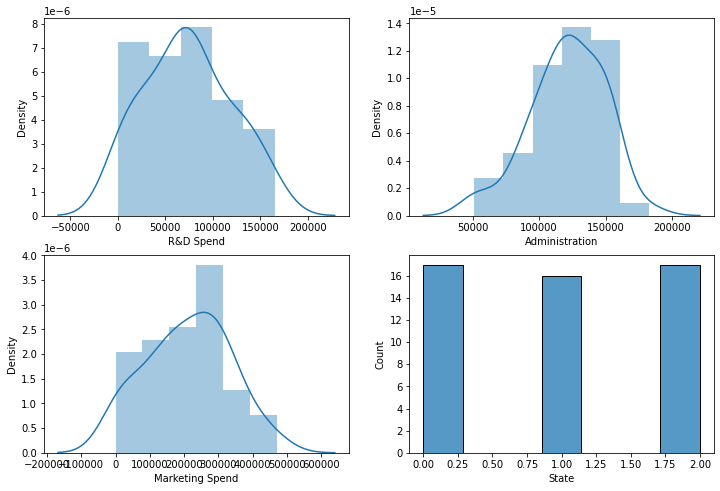

In [10]:
# visulize the data 
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(df['R&D Spend'])
plt.subplot(2,2,2)
sns.distplot(df['Administration'])
plt.subplot(2,2,3)
sns.distplot(df['Marketing Spend'])
plt.subplot(2,2,4)
sns.histplot(df['State'])
plt.show()

<AxesSubplot:>

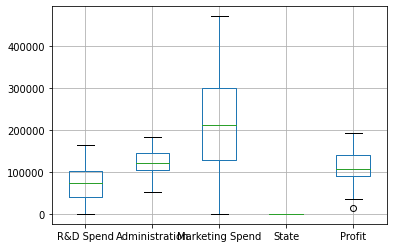

In [11]:
#check if the data has outliers 
df.boxplot()

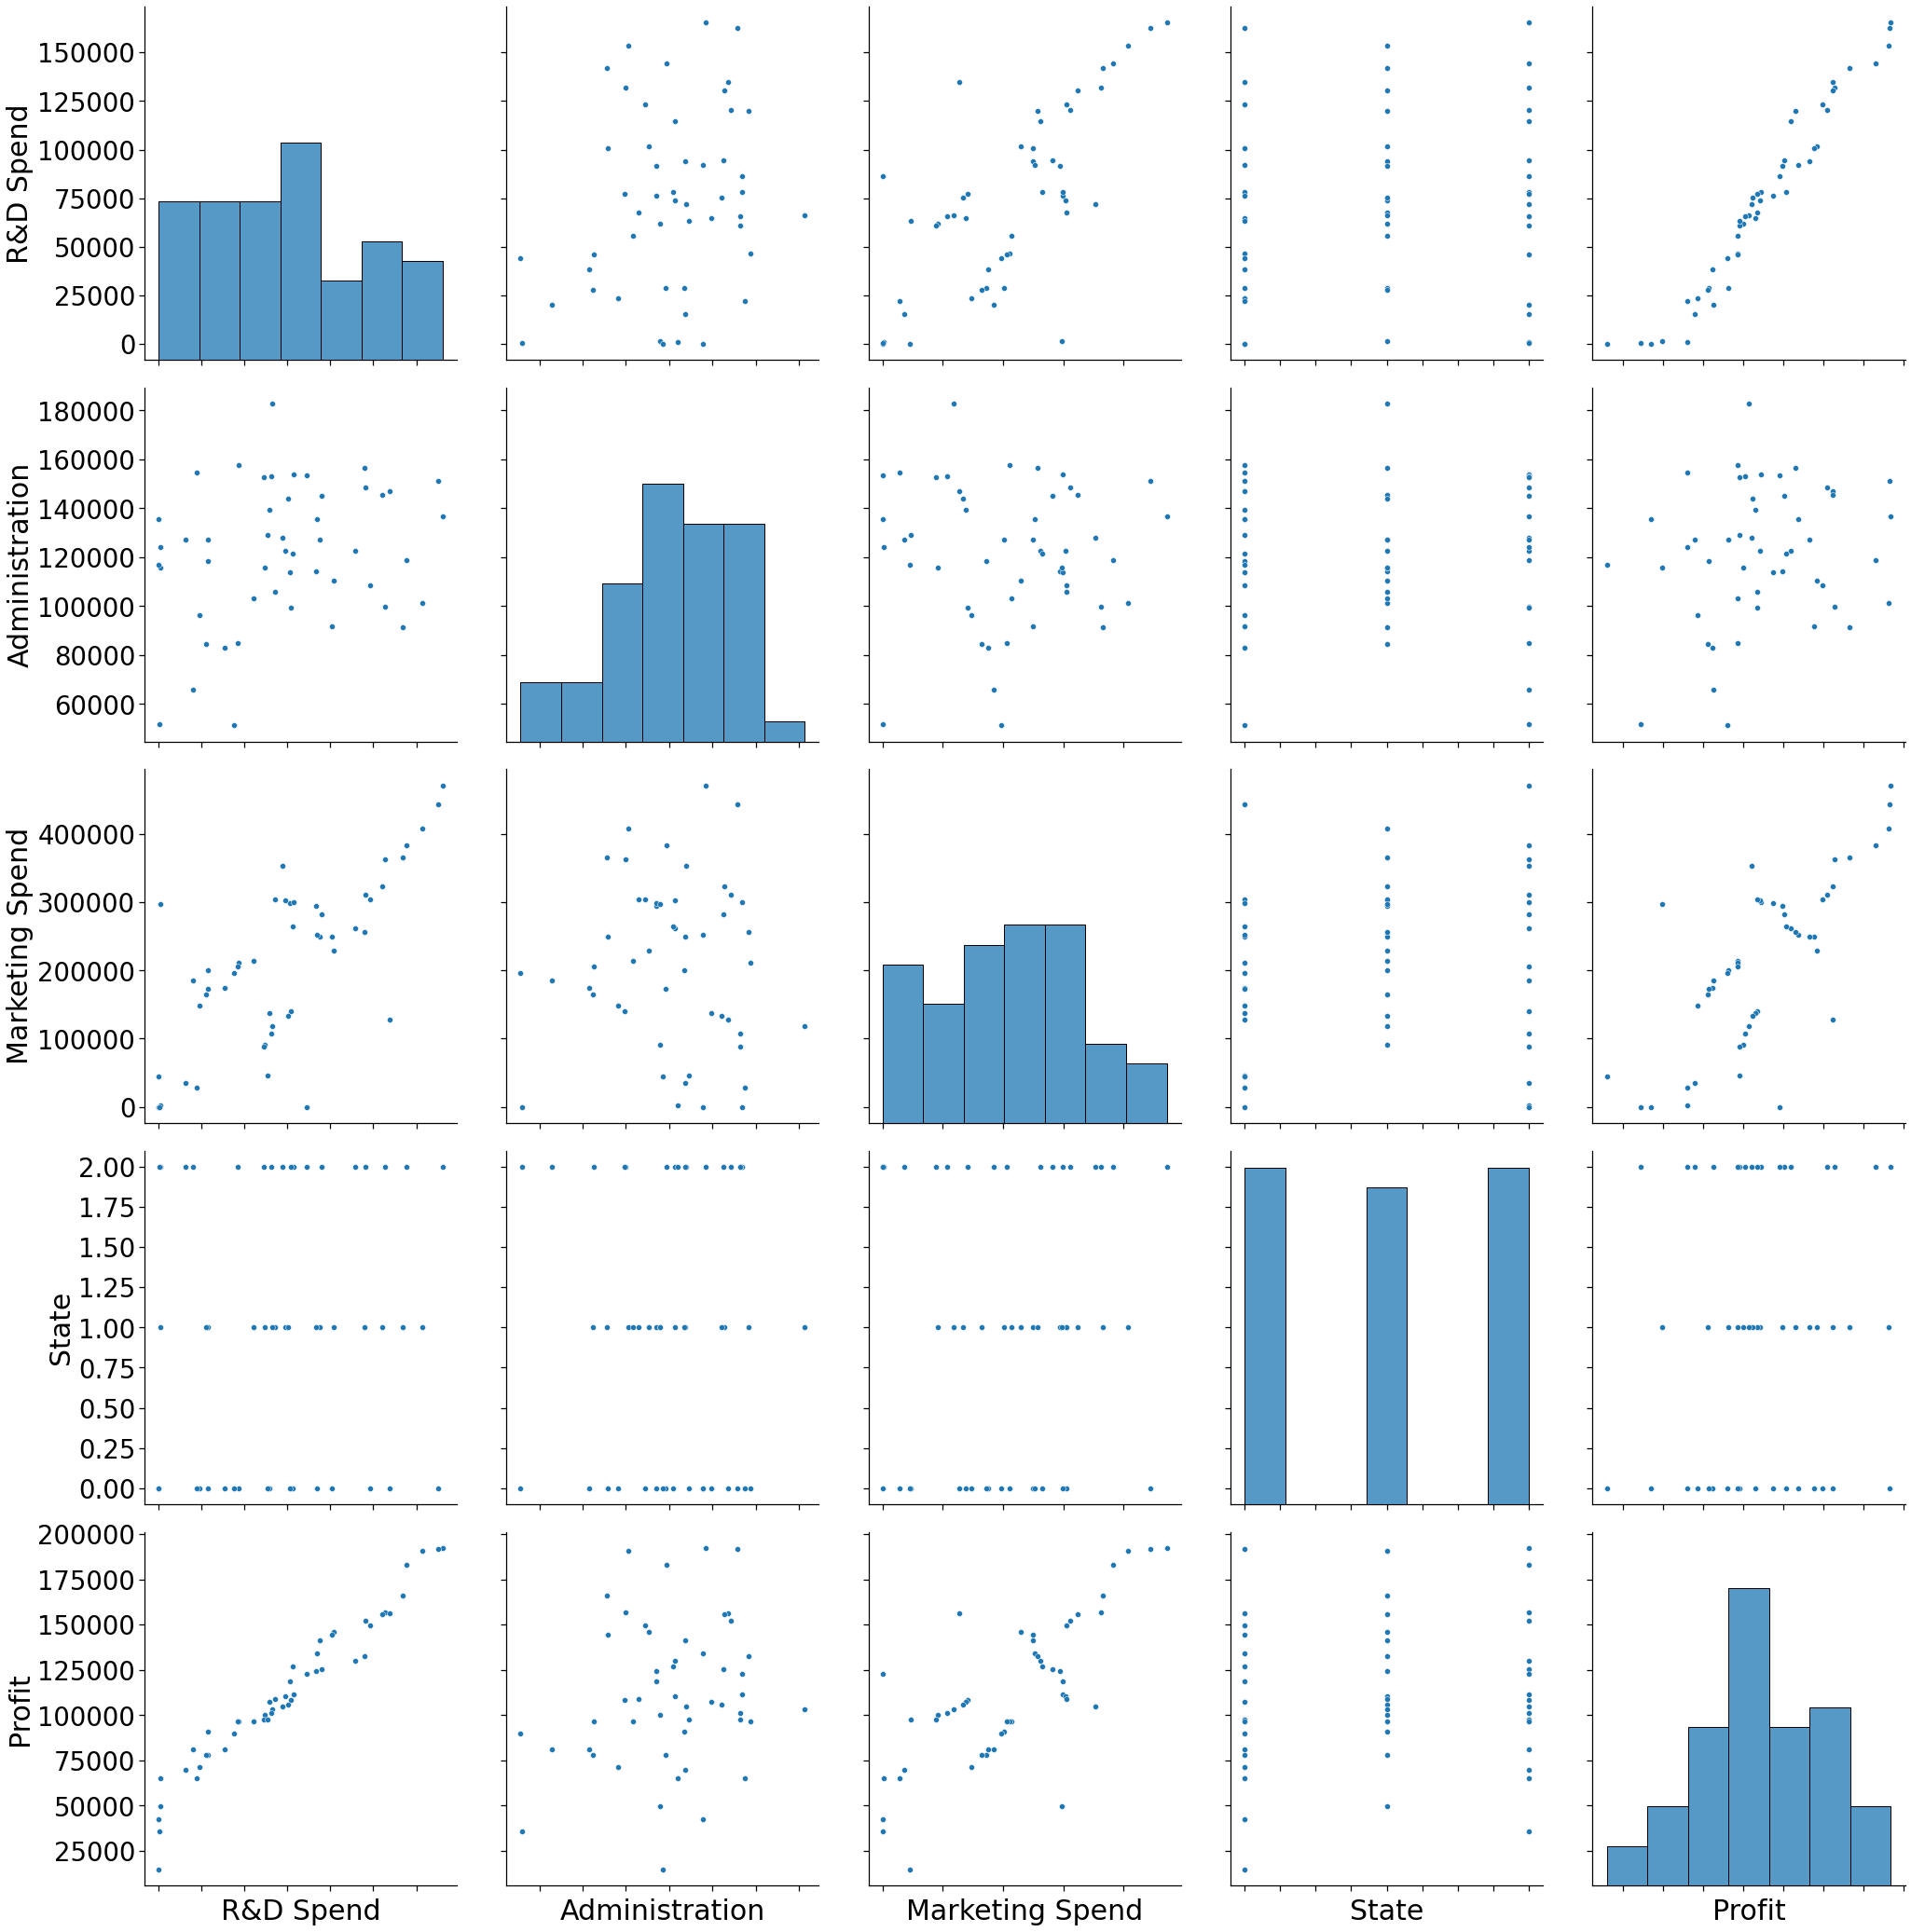

In [12]:
#understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df, palette='tab20',size=6)
g.set(xticklabels=[]);

In [13]:
#separating independent and dependent variable
x=df.drop(columns='Profit',axis=1,inplace=False)
y=df['Profit']
#splitting dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x)

In [15]:
predict=np.asanyarray(y_pred)
predict

array([192405.36723938, 188372.32164914, 183282.8185662 , 174012.86095334,
       173529.22121764, 164613.84352974, 156280.09782326, 159038.43298635,
       150580.18648454, 155370.11182722, 135634.3203638 , 136573.94051754,
       128674.84894142, 126720.66150723, 147861.20546832, 145956.8831759 ,
       116793.13378949, 129113.18318813, 129277.03638384, 113085.59056068,
       116976.83483923, 115983.28869586, 114684.06251072, 110691.85664598,
       113626.87239846, 100893.57078084, 109015.01626803, 114364.20290328,
        98445.63573877,  99737.17695133,  98890.31854876,  95575.90310531,
        97713.73821431,  98380.5898282 ,  87278.37297944,  91681.91099118,
        74762.6003117 ,  92180.51310337,  71620.4698089 ,  84909.08961912,
        74544.49874604,  75872.80012696,  71177.51219374,  58970.75707837,
        62279.90534525,  46479.31240248,  56544.12427893,  44883.84374867,
        50968.88397762,  47548.45675319])

In [16]:
table=pd.DataFrame({'Actual':df['Profit'],'Predict':predict})
table.head(10)

,Actual,Predict
0,192261.83,192405.367239
1,191792.06,188372.321649
2,191050.39,183282.818566
3,182901.99,174012.860953
4,166187.94,173529.221218
5,156991.12,164613.843530
6,156122.51,156280.097823
7,155752.60,159038.432986
8,152211.77,150580.186485
9,149759.96,155370.111827


# 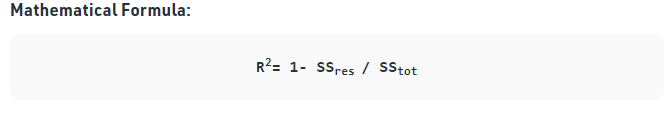


Where
SSres is the sum of squares of the residual errors.
SStot is the total sum of the errors.

In [17]:
# caculate the R2 manually
table['Prediction Erro']=table['Actual']-table['Predict']#erro
table['Sres']=table['Prediction Erro']*table['Prediction Erro'] #squre erro
#caculate the profit mean or y
y_mean=table['Actual'].mean()
table['Ssquare']=table['Actual']-y_mean #sum square
table['Ssquare']=table['Ssquare']*table['Ssquare']

table.head()

,Actual,Predict,Prediction Erro,Sres,Ssquare
0,192261.83,192405.367239,-143.537239,2.060294e+04,6.439933e+09
1,191792.06,188372.321649,3419.738351,1.169461e+07,6.364756e+09
2,191050.39,183282.818566,7767.571434,6.033517e+07,6.246966e+09
3,182901.99,174012.860953,8889.129047,7.901662e+07,5.025300e+09
4,166187.94,173529.221218,-7341.281218,5.389441e+07,2.934963e+09


In [18]:
#calculate the R2 
SST=table.Ssquare.sum()
SSR=table.Sres.sum()
R_2=1-(SSR/SST)
R_2

0.9496913509509273

In [19]:
#make sure from tha vlaue 
from sklearn.metrics import r2_score
r2_score(df['Profit'],predict)

0.9496913509509273

# Data Transformation

In [20]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
tans=MinMaxScaler()
df_new=pd.DataFrame(tans.fit_transform(df[['R&D Spend','Administration','Marketing Spend','Profit']]),columns=['R&D Spend','Administration','Marketing Spend','Profit'])
df_new['State']=df['State']
df_new.head()

,R&D Spend,Administration,Marketing Spend,Profit,State
0,1.000000,0.651744,1.000000,1.000000,2
1,0.983359,0.761972,0.940893,0.997355,0
2,0.927985,0.379579,0.864664,0.993178,1
3,0.873136,0.512998,0.812235,0.947292,2
4,0.859438,0.305328,0.776136,0.853171,1


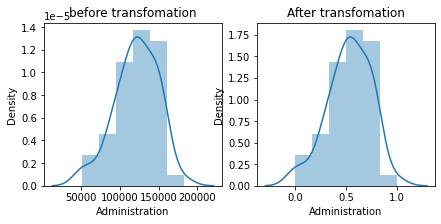

In [23]:
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.title('before transfomation')
sns.distplot(df['Administration'])
plt.subplot(1,2,2)
plt.title('After transfomation')
sns.distplot(df_new['Administration'])
plt.show()

In [24]:
#declare dependent and independent varaible
X=df_new.drop(columns='Profit',axis=1,inplace=False)
Y=df_new.Profit

In [25]:
import statsmodels.api as sm
X = sm.add_constant(X)

In [26]:
model=sm.OLS(Y,X).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           8.51e-29
Time:                        10:58:17   Log-Likelihood:                 78.973
No. Observations:                  50   AIC:                            -147.9
Df Residuals:                      45   BIC:                            -138.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1919      0.026      7.409      0.000       0.140       0.244
R&D Spend           0.7503      0.043     17.609      0.000       0.664       0.836
Administration     -0.0198      0.038     -0.520      0.606      -0.097       0.057
Marketing Spend     0.0723      0.044      1.637      0.109      -0.017       0.161
State              -0.0001      0.009     -0.014      0.989      -0.018       0.018
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
r2_score(df_new.Profit,y_pred)

-277118766012.5243